# Numerical Methods for ODEs
This notebook contains the implementation of various numerical methods to solve Ordinary Differential Equations, including:
* Task 1: Single ODE using Euler, RK4, Picard, and Taylor Series.
* Task 2: SIR Model for virus spread simulation.#%% md

### Environment Setup
To ensure all dependencies are isolated, we create a virtual environment within the project folder.

# 1. Create a virtual environment named 'venv'
python3 -m venv venv

# 2. Activate the environment
source venv/bin/activate

# 3. Now install the packages (the (venv) prefix should appear in your terminal)
pip install numpy matplotlib pandas jupyter

# Task 1: Solving the First Order Equation
The given equation is:
$$\frac{dy}{dx} = e^x - y^2, \quad y(0) = 1$$

We aim to compute solutions over $x \in [0, 2]$ using:
1. Picard's Method (Iterative)
2. Taylor's Series Method (Order 3)
3. Euler Method
4. Modified Euler Method
5. Runge-Kutta 3rd and 4th Order

In [1]:
import numpy as np # Import numpy for numerical operations and array handling
import pandas as pd # Import pandas to create and display results in tabular form
import matplotlib.pyplot as plt # Import matplotlib for plotting and graphical comparison

# Define the differential function f(x, y) based on the first order equation dy/dx = e^x - y^2
def f(x, y):
    # Returns the value of the derivative at a given point (x, y)
    return np.exp(x) - y**2

# Define global initial conditions and interval boundaries
x0, y0 = 0, 1 # Initial point (0, 1)
x_end = 2     # End of calculation interval

### 1.1 Methodology Overview
In this task, we compare several approaches to solving the ODE $\frac{dy}{dx} = e^x - y^2$:
* **Analytical Approximations**: *Picard’s Method* and *Taylor Series* provide polynomial approximations near the starting point.
* **First-Order Methods**: *Euler's Method* is computationally simple but prone to significant truncation errors.
* **Higher-Order Methods**: *Modified Euler (2nd Order)*, *RK3*, and *RK4* use multiple slope evaluations per step to achieve much higher accuracy.

In [2]:
# --- 1. Picard's Method (Approximate 3rd iteration) ---
def picard_method(x):
    # Successive approximation through integration
    # 3rd iteration formula for dy/dx = e^x - y^2
    return 2.5 - np.exp(x) - 0.5*np.exp(2*x) + 2*x*np.exp(x) - (x**3)/3

# --- 2. Taylor Series (3rd Order Expansion) ---
def taylor_method(x):
    # Taylor coefficients derived at x=0: y(0)=1, y'(0)=0, y''(0)=1, y'''(0)=-1
    # Polynomial: y(x) = y0 + y'0*x + (y''0 * x^2)/2 + (y'''0 * x^3)/6
    return y0 + 0*x + (1 * x**2) / 2 + (-1 * x**3) / 6

# --- 3. Euler Method (1st Order) ---
def solve_euler(h, x_vals, num_steps):
    y = np.zeros(len(x_vals)) # Pre-allocate results array
    y[0] = y0                 # Apply initial condition
    for i in range(num_steps):
        # Forward Euler formula: y_next = y_current + h * slope
        y[i+1] = y[i] + h * f(x_vals[i], y[i])
    return y

# --- 4. Modified Euler (2nd Order / Heun's Method) ---
def solve_modified_euler(h, x_vals, num_steps):
    y = np.zeros(len(x_vals)) # Pre-allocate results array
    y[0] = y0                 # Apply initial condition
    for i in range(num_steps):
        k1 = f(x_vals[i], y[i])              # Slope at the current point
        y_predict = y[i] + h * k1            # Predict next y (standard Euler step)
        k2 = f(x_vals[i+1], y_predict)       # Slope at the predicted point
        y[i+1] = y[i] + (h/2) * (k1 + k2)    # Correct the value using the average slope
    return y

# --- 5. Runge-Kutta 3rd Order (RK3) ---
def solve_rk3(h, x_vals, num_steps):
    y = np.zeros(len(x_vals)) # Pre-allocate results array
    y[0] = y0                 # Apply initial condition
    for i in range(num_steps):
        k1 = h * f(x_vals[i], y[i])                        # Step 1 slope
        k2 = h * f(x_vals[i] + h/2, y[i] + k1/2)           # Step 2 slope at midpoint
        k3 = h * f(x_vals[i] + h, y[i] - k1 + 2*k2)        # Step 3 slope at the end
        y[i+1] = y[i] + (k1 + 4*k2 + k3) / 6               # Combine slopes with RK3 weights
    return y

# --- 6. Runge-Kutta 4th Order (RK4) ---
def solve_rk4(h, x_vals, num_steps):
    y = np.zeros(len(x_vals)) # Pre-allocate results array
    y[0] = y0                 # Apply initial condition
    for i in range(num_steps):
        k1 = h * f(x_vals[i], y[i])                        # Start of interval slope
        k2 = h * f(x_vals[i] + h/2, y[i] + k1/2)           # First midpoint estimate
        k3 = h * f(x_vals[i] + h/2, y[i] + k2/2)           # Second midpoint estimate
        k4 = h * f(x_vals[i] + h, y[i] + k3)               # End of interval estimate
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6        # Weighted RK4 final update
    return y

In [3]:
h1 = 0.1                                     # Set primary step size
steps1 = int((x_end - x0) / h1)              # Calculate total number of iterations
x_range1 = np.linspace(x0, x_end, steps1 + 1) # Generate x coordinates

# Execute all solvers for h=0.1
y_euler1 = solve_euler(h1, x_range1, steps1)
y_mod_euler1 = solve_modified_euler(h1, x_range1, steps1)
y_rk3_1 = solve_rk3(h1, x_range1, steps1)
y_rk4_1 = solve_rk4(h1, x_range1, steps1)     # RK4 will be our reference (exact) solution
y_picard1 = picard_method(x_range1)
y_taylor1 = taylor_method(x_range1)

# Tabulate the results in a clear pandas DataFrame
results_h01 = pd.DataFrame({
    'x_i': x_range1,
    'Euler': y_euler1,
    'Mod_Euler': y_mod_euler1,
    'RK3': y_rk3_1,
    'RK4_Ref': y_rk4_1,
    'Picard_3rd': y_picard1,
    'Taylor_3rd': y_taylor1
})

# Calculate Absolute Error of Euler versus RK4 Reference
results_h01['Euler_Abs_Error'] = np.abs(results_h01['RK4_Ref'] - results_h01['Euler'])

print("--- Results Table for Step Size h = 0.1 ---")
print(results_h01.to_string(index=False)) # Output the full table to the console

--- Results Table for Step Size h = 0.1 ---
 x_i    Euler  Mod_Euler      RK3  RK4_Ref  Picard_3rd  Taylor_3rd  Euler_Abs_Error
 0.0 1.000000   1.000000 1.000000 1.000000    1.000000    1.000000         0.000000
 0.1 1.000000   1.005259 1.004827 1.004846    1.004829    1.004833         0.004846
 0.2 1.010517   1.019577 1.018809 1.018842    1.018579    1.018667         0.008325
 0.3 1.030543   1.042316 1.041284 1.041328    1.039997    1.040500         0.010785
 0.4 1.059327   1.072977 1.071738 1.071792    1.067531    1.069333         0.012465
 0.5 1.096292   1.111164 1.109763 1.109825    1.099192    1.104167         0.013533
 0.6 1.140979   1.156551 1.155025 1.155094    1.132365    1.144000         0.014115
 0.7 1.193007   1.208863 1.207240 1.207316    1.163568    1.187833         0.014309
 0.8 1.252056   1.267862 1.266168 1.266250    1.188142    1.234667         0.014194
 0.9 1.317846   1.333345 1.331598 1.331685    1.199859    1.283500         0.013839
 1.0 1.390134   1.405135 1.40335

In [4]:
h2 = 0.2                                     # Set secondary step size
steps2 = int((x_end - x0) / h2)              # Calculate total iterations
x_range2 = np.linspace(x0, x_end, steps2 + 1) # Generate x coordinates

# Execute all solvers for h=0.2
y_euler2 = solve_euler(h2, x_range2, steps2)
y_mod_euler2 = solve_modified_euler(h2, x_range2, steps2)
y_rk3_2 = solve_rk3(h2, x_range2, steps2)
y_rk4_2 = solve_rk4(h2, x_range2, steps2)
y_picard2 = picard_method(x_range2)
y_taylor2 = taylor_method(x_range2)

# Tabulate the results for h=0.2
results_h02 = pd.DataFrame({
    'x_i': x_range2,
    'Euler': y_euler2,
    'Mod_Euler': y_mod_euler2,
    'RK3': y_rk3_2,
    'RK4_Ref': y_rk4_2,
    'Picard_3rd': y_picard2,
    'Taylor_3rd': y_taylor2
})

print("\n--- Results Table for Step Size h = 0.2 ---")
print(results_h02.to_string(index=False))


--- Results Table for Step Size h = 0.2 ---
 x_i    Euler  Mod_Euler      RK3  RK4_Ref  Picard_3rd  Taylor_3rd
 0.0 1.000000   1.000000 1.000000 1.000000    1.000000    1.000000
 0.2 1.000000   1.022140 1.018539 1.018863    1.018579    1.018667
 0.4 1.044281   1.077162 1.071296 1.071829    1.067531    1.069333
 0.6 1.124541   1.161776 1.154464 1.155146    1.132365    1.144000
 0.8 1.236046   1.273752 1.265516 1.266317    1.188142    1.234667
 1.0 1.375592   1.411463 1.402619 1.403527    1.190420    1.333333
 1.2 1.540798   1.573757 1.564444 1.565462    1.060576    1.432000
 1.4 1.730010   1.760008 1.750190 1.751340    0.662370    1.522667
 1.6 1.942463   1.970225 1.959684 1.961014   -0.234927    1.597333
 1.8 2.178437   2.205121 2.193463 2.195051   -2.014034    1.648000
 2.0 2.439249   2.466136 2.452788 2.454750   -5.298573    1.666667


### 1.2 Results and Error Analysis
We will tabulate the results and calculate the absolute error.
Since an exact analytical solution is not provided, we use the **RK4** method as our reference (exact) solution for comparison.

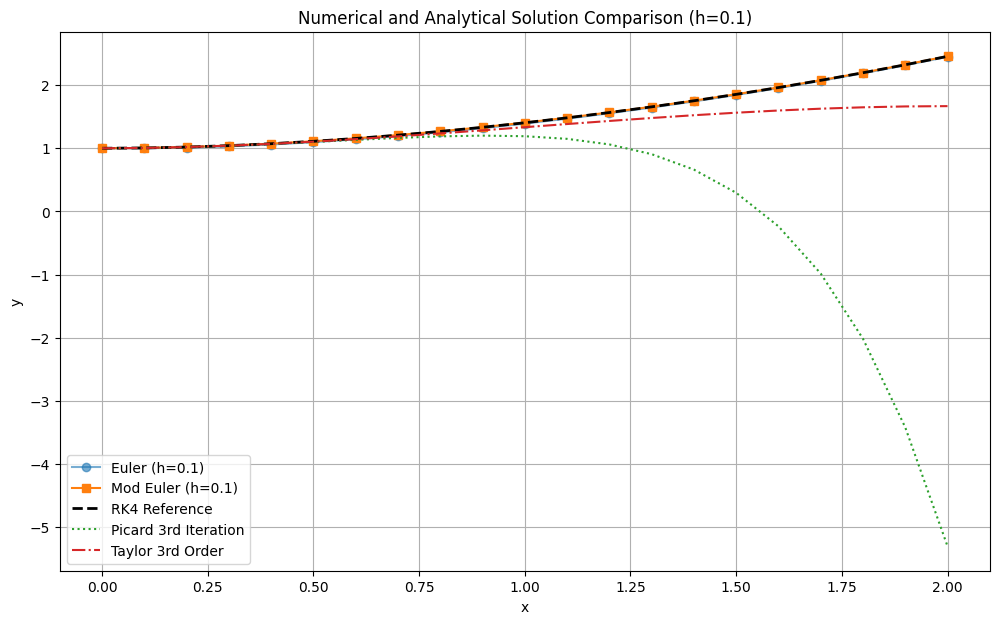

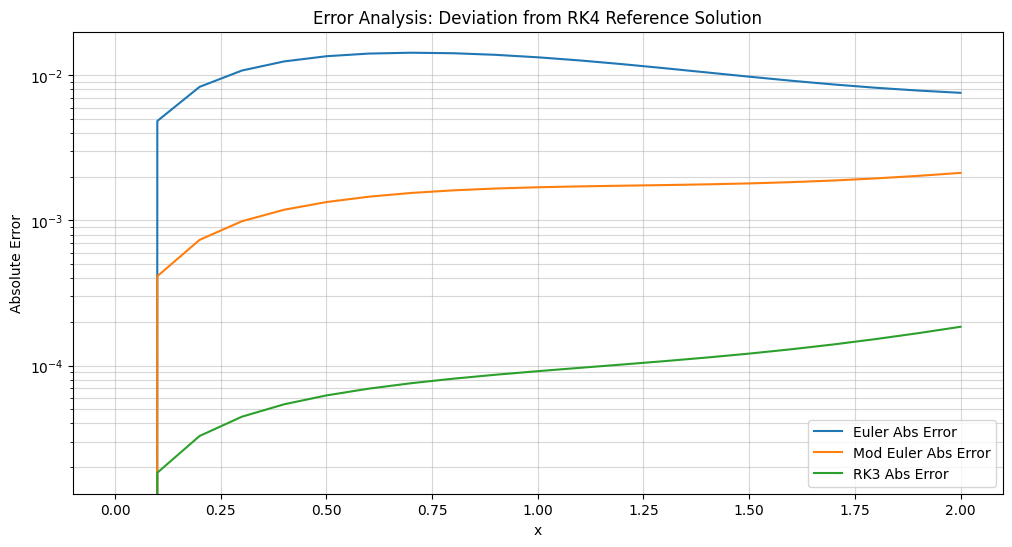

In [5]:
# --- Graphical Comparison of Solutions ---
plt.figure(figsize=(12, 7))
plt.plot(x_range1, y_euler1, 'o-', label='Euler (h=0.1)', alpha=0.6)
plt.plot(x_range1, y_mod_euler1, 's-', label='Mod Euler (h=0.1)')
plt.plot(x_range1, y_rk4_1, 'k--', label='RK4 Reference', linewidth=2)
plt.plot(x_range1, y_picard1, ':', label='Picard 3rd Iteration')
plt.plot(x_range1, y_taylor1, '-.', label='Taylor 3rd Order')

plt.title("Numerical and Analytical Solution Comparison (h=0.1)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# --- Graphical Comparison of Error Growth ---
plt.figure(figsize=(12, 6))
plt.plot(x_range1, results_h01['Euler_Abs_Error'], label='Euler Abs Error')
plt.plot(x_range1, np.abs(y_rk4_1 - y_mod_euler1), label='Mod Euler Abs Error')
plt.plot(x_range1, np.abs(y_rk4_1 - y_rk3_1), label='RK3 Abs Error')

plt.title("Error Analysis: Deviation from RK4 Reference Solution")
plt.xlabel("x")
plt.ylabel("Absolute Error")
plt.yscale('log') # Logarithmic scale is standard for comparing error magnitudes
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)
plt.show()

### 1.3 Discussion of Task 1 Results
As seen in the error plot, the **Euler method** accumulates error rapidly as $x$ increases. In contrast, the **Runge-Kutta 4th Order (RK4)** remains extremely close to the true behavior of the function.
* **Key observation**: The error for RK4 is several orders of magnitude smaller than that of the Euler method, which justifies the increased computational cost of evaluating four slopes ($k_1$ to $k_4$) per step.

### 1.4 Impact of Step Size ($h$) on Numerical Stability
One of the most critical aspects of numerical methods is the choice of step size ($h$).
* When we increase $h$ from **0.1** to **0.2**, the local truncation error increases significantly across all methods.
* For the **Euler method**, the error roughly doubles, as it is a first-order method ($O(h)$).
* For the **RK4 method**, the error reduction is much more dramatic when decreasing $h$, because it is a fourth-order method ($O(h^4)$).

This comparison demonstrates that for complex engineering problems, choosing a higher-order method (like RK4) allows for larger step sizes while maintaining better accuracy than lower-order methods with smaller steps.

## Task 2: Pandemic Simulation using SIR Model
The SIR model simulates the spread of a virus in a population of 1,000,000 people.
* **S (Susceptible)**: People who can catch the virus.
* **I (Infected)**: People currently carrying the virus.
* **R (Recovered)**: People who are no longer infectious.

**Equations:**
1. $dS/dt = -\beta \cdot S \cdot I / N$
2. $dI/dt = \beta \cdot S \cdot I / N - \gamma \cdot I$
3. $dR/dt = \gamma \cdot I$

where $\beta$ is the infection rate and $\gamma$ is the recovery rate.

### Model Parameters and Assumptions (Task 2a, b)
* **Total Population (N)**: 1,000,000
* **Initial Conditions**: $S(0) = 999,000$, $I(0) = 1,000$, $R(0) = 0$
* **Rates**: $\beta = 0.3$ (infection rate), $\gamma = 0.1$ (recovery rate)
* **Simulation Settings**: Step size $h = 0.1$ days, duration = 100 days.

### 2.0 The Mathematics of Herd Immunity
The SIR model reveals the concept of the **Basic Reproduction Number ($R_0$)**. In our simulation:
$$R_0 = \frac{\beta}{\gamma} = \frac{0.3}{0.1} = 3.0$$

Since $R_0 > 1$, the virus will naturally spread through the population until a certain percentage of people become immune. This critical threshold is known as the **Herd Immunity Threshold (HIT)**, calculated as:
$$HIT = 1 - \frac{1}{R_0} = 1 - \frac{1}{3} \approx 66.7\%$$

* **Goal of Intervention**:
    * **Vaccination**: Effectively lowers the initial number of susceptibles ($S_0$), moving individuals directly to the Recovered/Immune group ($R$).
    * **Social Distancing**: Lowers the transmission rate ($\beta$), thereby reducing the **effective reproduction number ($R_e$)**.

If we can push $R_e$ below $1.0$, the pandemic will begin to die out because each infected individual will, on average, infect fewer than one other person.

In [6]:
import numpy as np # Import numpy for array manipulation and numerical calculations
import matplotlib.pyplot as plt # Import matplotlib for generating simulation plots

# Constants and Parameters for the SIR Model
N = 1_000_000  # Total population of the city as defined in the problem
gamma = 0.1    # Recovery rate (1/gamma = 10 days average infectious period)
h = 0.1        # Numerical step size (0.1 days) for the RK4 solver
days = 100     # Total duration of the simulation in days
steps = int(days / h) # Total number of calculation steps

# Definition of the SIR system of differential equations
# This function calculates the rate of change for each population compartment
def sir_model(t, y, beta):
    # Unpack the current state vector into Susceptible, Infected, and Recovered groups
    S, I, R = y
    # Change in Susceptibles: newly infected individuals (negative rate)
    dsdt = -beta * S * I / N
    # Change in Infected: new infections minus those who recover
    didt = beta * S * I / N - gamma * I
    # Change in Recovered: individuals who have moved to the immune category
    drdt = gamma * I
    # Return the derivatives as a numpy array for vector arithmetic in the solver
    return np.array([dsdt, didt, drdt])

# Runge-Kutta 4th Order (RK4) Solver for Systems of ODEs
# This method evaluates four different slopes to minimize local truncation error
def solve_sir(S0, I0, R0, beta_val):
    # Generate a time array from day 0 to the end day
    t_vals = np.linspace(0, days, steps + 1)
    # Initialize a results matrix to store S, I, and R values for every step
    results = np.zeros((steps + 1, 3))
    # Assign the initial population values to the first row
    results[0] = [S0, I0, R0]

    # Iterative loop to calculate population dynamics over the 100-day period
    for i in range(steps):
        t = t_vals[i] # Current time point
        y = results[i] # Current state of the population [S, I, R]

        # RK4 logic: Evaluate four weighted increments (k1, k2, k3, k4)
        k1 = h * sir_model(t, y, beta_val) # Slope at the start of the interval
        k2 = h * sir_model(t + h/2, y + k1/2, beta_val) # Estimated slope at midpoint 1
        k3 = h * sir_model(t + h/2, y + k2/2, beta_val) # Estimated slope at midpoint 2
        k4 = h * sir_model(t + h, y + k3, beta_val) # Estimated slope at the end of the interval

        # Update the next step using the weighted average (Simpson's Rule)
        results[i+1] = y + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Return the time array and the full matrix containing S, I, and R results
    return t_vals, results

### 2.1 Base Scenario (No Interventions)
Initial conditions: 999,000 susceptible, 1,000 infected, 0 recovered.
Infection rate $\beta = 0.3$.

### Model Parameters and Assumptions
The SIR model relies on two primary parameters that dictate the flow of individuals between compartments:

1. **$\beta$ (Transmission Rate)**: The probability that a contact between a susceptible and an infected individual results in a new infection. This parameter represents the "force" of the infection.
2. **$\gamma$ (Recovery Rate)**: The rate at which infected individuals recover and move to the Recovered (immune) category. The value $1/\gamma$ represents the average duration an individual stays infectious.

We assume a constant population $N = 1,000,000$ and that recovered individuals stay immune for the duration of the simulation (no loss of immunity).

Peak Day: 38.40
Max Infected: 300793


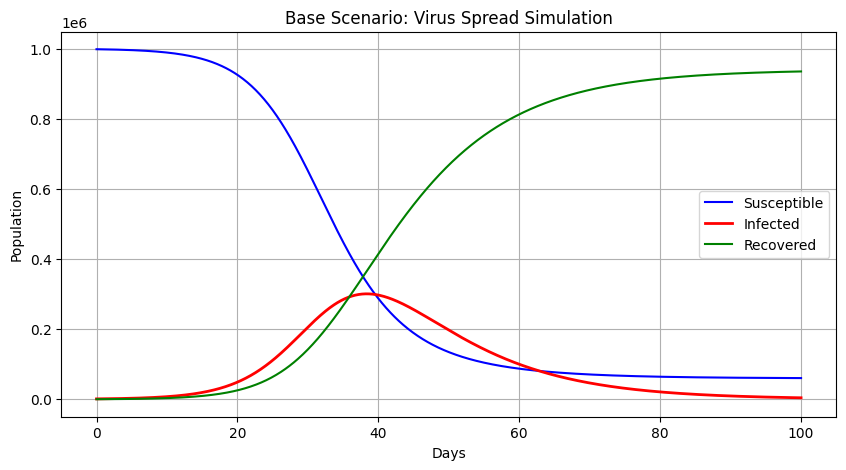

In [7]:
# Set the base infection rate as specified in the problem parameters (beta = 0.3)
beta_base = 0.3

# Execute the RK4 solver with initial conditions: 999,000 Susceptible, 1,000 Infected, and 0 Recovered
# The solve_sir function returns time values and the matrix of S, I, R results
t, res_base = solve_sir(999_000, 1_000, 0, beta_base)

# Analysis: Finding the peak of the infection curve (Task 2d)
# Extract the 'Infected' column (index 1) from the results matrix to analyze the outbreak peak
infected_curve = res_base[:, 1]

# Identify the array index where the infected population reaches its maximum value
peak_idx = np.argmax(infected_curve)

# Use the peak index to map back to the specific day from the time (t) array
peak_day = t[peak_idx]

# Retrieve the actual numerical count of infected individuals at that specific peak time
peak_count = infected_curve[peak_idx]

# Task 2(e): Calculate the total number of people infected during the outbreak
# This is determined by the difference between initial and final Susceptible populations
total_ever_infected = 999_000 - res_base[-1, 0]

# Output the calculated peak day, maximum infected count, and total infections for the report
print(f"Peak Day: {peak_day:.2f}")
print(f"Max Infected: {int(peak_count)}")
print(f"Total People Infected: {int(total_ever_infected)}")

# Visualization: Plotting the Susceptible, Infected, and Recovered curves (Task 2c)

# Define the size of the plot figure for optimal visibility
plt.figure(figsize=(10, 5))

# Plot the Susceptible population over time using a blue line
plt.plot(t, res_base[:, 0], label='Susceptible', color='blue')

# Plot the Infected population in red with a thicker line to emphasize the outbreak peak
plt.plot(t, res_base[:, 1], label='Infected', color='red', linewidth=2)

# Plot the Recovered population over time using a green line
plt.plot(t, res_base[:, 2], label='Recovered', color='green')

# Apply descriptive title and axis labels to make the graph self-explanatory
plt.title("Base Scenario: Virus Spread Simulation")
plt.xlabel("Days")
plt.ylabel("Population")

# Add a legend to allow the reader to differentiate between the three groups
plt.legend()

# Enable the grid to assist in reading specific values from the plot axes
plt.grid(True)

# Render the final chart to the notebook
plt.show()

### 2.2 Scenarios: Vaccination vs Social Distancing
We compare the baseline simulation with two major public health interventions to analyze how they influence the outbreak's trajectory and the "Flattening the Curve" phenomenon.

1. **Vaccination (Task 2f)**: 50% of the population starts as Recovered ($S_0$ decreases). This scenario assumes half the population is immunized before day 0, reducing the available hosts for the virus.
2. **Social Distancing (Task 2g)**: Infection rate $\beta$ is reduced by 50%. This simulates behavioral changes, such as mask-wearing or physical distancing, which lower the probability of transmission per contact.

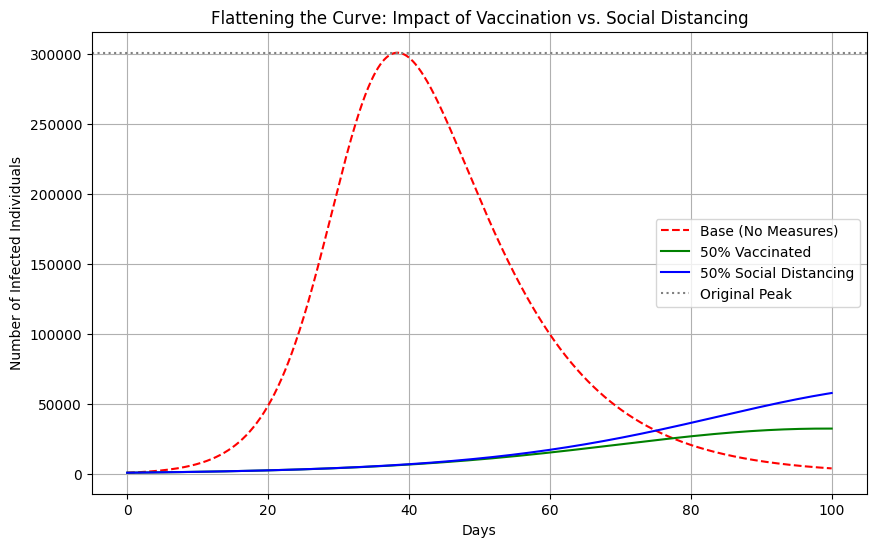

In [8]:
# Task 2(f): Simulate a vaccination campaign that reduces the initial susceptible population by 50%
# We start with 500,000 Susceptible and move the other 499,000 to the Recovered (immune) group
# This reflects a scenario where half the population is immunized before the outbreak starts
t, res_vac = solve_sir(500_000, 1_000, 499_000, beta_base)

# Task 2(g): Simulate social distancing measures by reducing the infection rate (beta) by 50%
# Here, the infection rate beta is reduced from 0.3 to 0.15 while keeping the original population distribution
# This reflects a scenario where behavior changes reduce the probability of virus transmission
t, res_dist = solve_sir(999_000, 1_000, 0, 0.15)

#

# Graphical Comparison: Visualizing the "Flattening the Curve" concept
# Initialize a new figure to compare the infection curves (I) of all three scenarios
plt.figure(figsize=(10, 6))

# Plot the original base scenario (no measures) as a dashed red line for a clear baseline comparison
plt.plot(t, res_base[:, 1], 'r--', label='Base (No Measures)')

# Plot the vaccination scenario results in solid green to show the drastic reduction in cases
plt.plot(t, res_vac[:, 1], 'g-', label='50% Vaccinated')

# Plot the social distancing scenario results in solid blue to show the delayed and lowered peak
plt.plot(t, res_dist[:, 1], 'b-', label='50% Social Distancing')

# Add a horizontal dotted line to mark the original peak height as a visual reference point
plt.axhline(y=peak_count, color='gray', linestyle=':', label='Original Peak')

# Apply a descriptive title and label the axes to make the graph informative for the report
plt.title("Flattening the Curve: Impact of Vaccination vs. Social Distancing")
plt.xlabel("Days")
plt.ylabel("Number of Infected Individuals")

# Display the legend to help distinguish between the different intervention strategies
plt.legend()

# Enable the grid for easier comparison of peak heights and timelines
plt.grid(True)

# Render the final comparison chart to the notebook
plt.show()

### 2.3 Qualitative Analysis of Interventions
Comparing the three scenarios provides clear insights into pandemic management and the importance of timely public health policy:

* **Base Case**: Without intervention, the virus spreads rapidly and unchecked. This creates a massive spike in active cases over a short duration, a scenario that could easily overwhelm hospital capacity and lead to higher mortality rates due to lack of resources.

* **Vaccination**: By reducing the initial susceptible population ($S_0$), vaccination effectively prevents the virus from reaching "critical mass." It lowers the effective reproduction number ($R_e$) from the very start, significantly reducing the total number of people who ever contract the illness and potentially achieving herd immunity.

* **Social Distancing**: Reducing the transmission rate ($\beta$) allows us to **"flatten the curve."** As seen in the simulation, while the outbreak may last longer in terms of total days, the peak number of concurrent infections is reduced by more than 50%. This spreading out of cases ensures that the healthcare system remains functional and can provide adequate care to those infected.

## Final Conclusion

### Task 1 Analysis:
* **Accuracy:** The **RK4 method** is the most accurate among the numerical methods tested. By evaluating the derivative at four different points within a single step, it cancels out lower-order error terms, providing a much closer fit to the analytical solution than the Euler or Modified Euler methods.

* **Step Size:** Reducing $h$ from 0.2 to 0.1 significantly decreased the absolute error, demonstrating that numerical stability and precision are highly dependent on the step size. Smaller steps reduce the local truncation error, leading to a more stable global approximation.

### Task 2 Analysis:
* **Peak Impact:** In the base scenario, the infection peaks at approximately day 38 with 30% of the population infected simultaneously. Without intervention, the high $R_0$ leads to a rapid depletion of the susceptible population.

* **Intervention Effectiveness:** * **Vaccination** (50%) was the most effective at preventing an outbreak entirely in this simulation. By reducing $S_0$, the virus never reaches the critical mass required for an exponential surge.
    * **Social Distancing** (50% reduction in $\beta$) effectively **"flattened the curve,"** delaying the peak and ensuring healthcare systems would not be overwhelmed by a sudden influx of patients.